# Python exercise

```txt
       video:  5
       title:  Python exercise
      author:  César Freire <cesar.freire@training.rumos.pt>
   reviewers:  Ana Felizardo, Paulo Martins
affiliations:  Rumos Formação
```


## Introduction

### How to validate "Número de identificação fiscal" aka NIF
https://pt.wikipedia.org/wiki/N%C3%BAmero_de_identifica%C3%A7%C3%A3o_fiscal

### The Verhoeff algorithm
https://en.wikipedia.org/wiki/Verhoeff_algorithm

---

## NIF Validator calculations
RUMOS NIF: 502624558


        5   0   2   6   2   4   5   5   8 
        9   8   7   6   5   4   3   2   1 
        ----------------------------------
        45  0  14  36  10  16  15  10   8 = Sum(154) mod 11 == 0  


In [1]:
# code
nif = '502624558'

total = []
pos = 0

for digit in nif:
    mul = int(digit) * (9-pos)
    total.append(mul)  # add lo list
    print(f'>>> {9-pos} x {int(digit)} = {mul:02}') 
    pos = pos + 1

total

>>> 9 x 5 = 45
>>> 8 x 0 = 00
>>> 7 x 2 = 14
>>> 6 x 6 = 36
>>> 5 x 2 = 10
>>> 4 x 4 = 16
>>> 3 x 5 = 15
>>> 2 x 5 = 10
>>> 1 x 8 = 08


[45, 0, 14, 36, 10, 16, 15, 10, 8]

In [2]:
# code
sum(total) % 11

0

### Reduce code enumerate

In [3]:
# code
total = []
for pos, digit in enumerate(nif):
    total.append( int(digit) * (9-pos) )

sum(total) % 11

0

### Better with a tuple comprehension

In [4]:
# code
total = sum(int(digit) * (9-pos) for pos, digit in enumerate(nif) )

total % 11 == 0

True

### Move it to a function

- reuse
- simplicity
- testing

In [5]:
# code
def validate_nif(nif: str) -> bool:
    """ Validates NIF number """
    total = sum( int(digit) * (9 - pos) for pos, digit in enumerate(nif) )
    return total % 11 == 0

In [6]:
validate_nif(nif='999999999') # False

False

In [7]:
validate_nif(nif='999999990') # True

True

### Improve function resilience to bad arguments

In [8]:
def validate_nif(nif: str) -> bool:
    """ Validates PT NIF """
    
    # test for length and type
    if len(nif) != 9 or not nif.isdigit():
        return False
    
    # test first digit 
    if nif[0] not in '12356789':
        return False
    
    total = sum( int(digit) * (9 - pos) for pos, digit in enumerate(nif) )
    return total % 11 == 0


In [9]:
validate_nif('99999999O')  # 'O' not '0' at the end

False

### Do more testings with other resources
Get a list of public NIF values

https://seonline.isca.ua.pt/se/loja/modelos/NIF-V%C3%A1lidos.pdf

In [10]:
def convert_txt_to_list(file_name: str) -> list:
    """ Converts a txt file to a list """

    with open(file_name) as file:
        nif_list = [line.strip().split() for  line in file]
        flat_list = [item for sublist in nif_list for item in sublist]
    return flat_list

convert_txt_to_list('nif_list.txt')

['192453670',
 '195516222',
 '195564227',
 '195612221',
 '195660226',
 '195708229',
 '195756223',
 '195804228',
 '124004229',
 '195516702',
 '195564707',
 '195612701',
 '195660706',
 '195708709',
 '195756703',
 '195804708',
 '100410553',
 '195517180',
 '195565185',
 '195613180',
 '195661184',
 '195709187',
 '195757181',
 '195805186',
 '177565551',
 '195517660',
 '195565665',
 '195613660',
 '195661664',
 '195709667',
 '195757661',
 '195805666',
 '115021485',
 '195518144',
 '195566149',
 '195614143',
 '195662148',
 '195710142',
 '195758145',
 '195806140',
 '117309222',
 '195518624',
 '195566629',
 '195614623',
 '195662628',
 '195710622',
 '195758625',
 '195806620',
 '150065809',
 '195519108',
 '195567102',
 '195615107',
 '195663101',
 '195711106',
 '195759109',
 '195807103',
 '107894203',
 '195519582',
 '195567587',
 '195615581',
 '195663586',
 '195711580',
 '195759583',
 '195807588',
 '141980125',
 '195520068',
 '195568060',
 '195616065',
 '195664060',
 '195712064',
 '195760069',
 '1958

### Count the number of False's

In [11]:
result = [validate_nif(nif) for nif in convert_txt_to_list('nif_list.txt')]
result.count(False) / len(result) * 100

9.25

### Try to find the problem

In [12]:
map = { chr(48+number):0 for number in range(10) }

for nif in convert_txt_to_list('nif_list.txt'):
    last_digit = nif[-1]
    if validate_nif(nif) == False:
        map[last_digit] += 1

map

{'0': 74,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0}

### Correct the function to solve 0/10 problem
Final version

In [13]:
def validate_nif(nif):
    """ Validates PT NIF """
    
    if len(nif) != 9 or not nif.isdigit():
        return False
    
    if nif[0] not in '12356789':
        return False

    total = sum( int(digit) * (9 - pos) for pos, digit in enumerate(nif) )

    # correct 0/10 problem
    if total % 11 == 1 and nif[-1] == '0':
        total += 10

    return total % 11 == 0

In [14]:
# test again
assert validate_nif('192453670') == True 

In [15]:
# see if you got it right
result = [validate_nif(nif) for nif in convert_txt_to_list('nif_list.txt')]
result.count(False) / sum(result) * 100

0.0

## Benchmark: How long does it take

In [16]:
%time validate_nif('12345678')

CPU times: user 4 μs, sys: 0 ns, total: 4 μs
Wall time: 8.11 μs


False

### Plot a benckmark graphic

Using library 

https://matplotlib.org/

In [17]:
%pip install -q matplotlib

Note: you may need to restart the kernel to use updated packages.


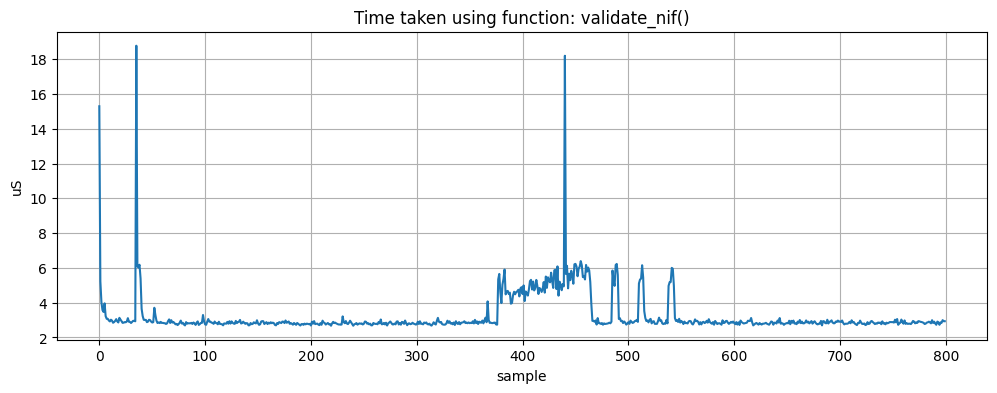

In [37]:
import time
from matplotlib import pyplot as plt 


table = []
for nif in convert_txt_to_list('nif_list.txt'):

    # start timer 
    start_time = time.time_ns()
    validate_nif(nif)
    
    # end timer
    stop_time = time.time_ns()

    # add difference to a list
    table.append((stop_time - start_time) / 1000)  # convert to microseconds

# plot graphic
plt.figure(figsize=(12,4))  # size in inch
plt.plot(table)
plt.title('Time taken using function: validate_nif()')
plt.ylabel('uS')
plt.xlabel('sample')
plt.grid()
plt.show()
